# **[과제2]**
### **winequality_red 데이터를 이용한 <span style="color:darkgreen">AI분류</span> 문제**
---

#### 와인의 성분 데이터를 이용하여 와인 등급을 분류하는 AI 문제입니다.
#### AI코딩 단계에 따라 주어지는 문제를 읽고 답안을 작성하세요.
 - 데이터 : 분류(카테고리)
 - 모델 : RandomForest(머신러닝 모델 비교 분석 추가), DeepLearning
 - 주요 전처리 : 분석 Column 추가, 정규화(normalization), label 전처리(카테고리 → 수치화)
 - 주요 학습 내용 : 산점도, 분류 모델 생성(분류방법, input, output 처리, 손실함수 등), 머신러닝 모델 비교학습(리스트 활용)
---





**winequality_red.csv / 에이드 판매 데이터 컬럼 설명**

- fixed acidity : 고정산 농도
- volatile acidity : 휘발산 농도
- citric acid : 구연산 농도
- residual sugar : 잔류 당분 농도
- chlorides : 염화물 농도
- free sulfur dioxide : 유리 아황산 농도
- total sulfur dioxide : 총 아황산 노도
- density : 밀도
- pH : pH, 수소이온농도지수
- sulphates : 황산염 농도
- alcohol : 알코올 도수
- quality : 와인 등급 0 ~ 10, integer
    * 현재 데이터는 3,4,5,6,7,8 만 있다.
---


[환경설정]
* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 aice 폴더를 만들고 데이터 파일을 복사해 넣습니다

In [1]:
# # 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# #Path 설정하기
# path = '/content/drive/MyDrive/aice/'

### **Q1. Pandas를 pd로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [3]:
# 여기에 답안코드를 작성하세요
import pandas as pd

### **Q2.Matplotlib의 pyplot을 plt로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [4]:
# 여기에 답안코드를 작성하세요
import matplotlib.pyplot as plt

### **Q3.winequality_red.csv를 판다스 데이터 프레임으로 불러와서 wine에 선언하는 코드를 작성하고 실행하시기 바랍니다.**
- 해당 csv는 string 형식으로 저장되어 있으며 ';' 기호로 항목을 분리해줘야 합니다.
---

In [5]:
# 여기에 답안코드를 작성하세요
wine = pd.read_csv("./winequality_red.csv",sep=';')

### **Q4. 데이터 프레임 wine의 처음 5개 행을 조회하는 코드를 작성하고 데이터가 올바르게 불러와졌는지 확인하시기 바랍니다.**
---

In [6]:
# 여기에 답안코드를 작성하세요
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **Q5. 데이터 프레임 wine의 alcohol 컬럼을 히스토그램으로 시각화 하시기 바랍니다.**

* **
- 시각화를 위해 데이터를 10개 구간으로 나눈다.
---

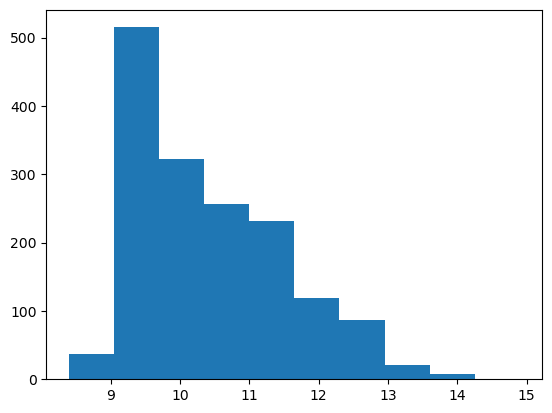

In [7]:
# 여기에 답안코드를 작성하세요
import numpy as np

plt.hist(wine['alcohol'].values, bins=10)
plt.show()

### **Q6. 다음 조건에 맞추어 데이터 프레임 wine에 새로운 컬럼 rat_ca를 제작하시기 바랍니다.**

* **
- rat_ca 는 구연산 농도(citric acid를 알코올 도수(alcohol)로 나눈 값으로 정의한다.
---

In [8]:
# 여기에 답안코드를 작성하세요
wine['rat_ca'] = wine['citric acid'] / wine['alcohol']

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rat_ca
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000000
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.000000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.004082
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.057143
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000000


### **Q7. 데이터 프레임 wine의 컬럼 rat_ac를 x축, quality를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**

---

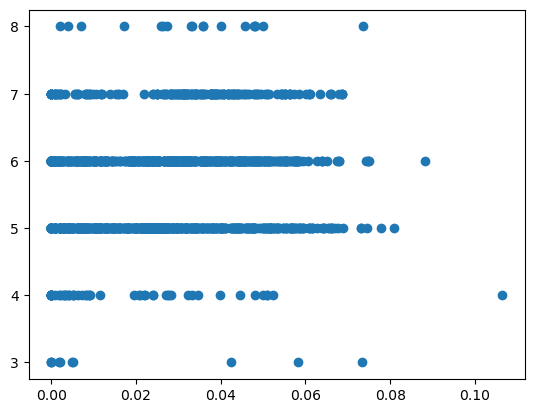

In [10]:
# 여기에 답안코드를 작성하세요
plt.scatter(wine['rat_ca'].values,wine['quality'].values)
plt.show()

### **Q8. 다음 조건에 맞추어 데이터 프레임 wine에 새로운 컬럼 rat_r2a를 제작하시기 바랍니다.**

* **
- rat_r2a 는 잔류 당분 농도(residual sugar)의 제곱을 알코올 도수(alcohol)로 나눈 값으로 정의한다.
---

In [11]:
# 여기에 답안코드를 작성하세요
wine['rat_r2a'] = (wine['residual sugar']**2 / wine['alcohol'])

In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rat_ca,rat_r2a
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000000,0.384043
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.000000,0.689796
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.004082,0.539796
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.057143,0.368367
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000000,0.384043


### **Q9. 데이터 프레임 wine의 컬럼 rat_r2a를 x축으로 quality를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**

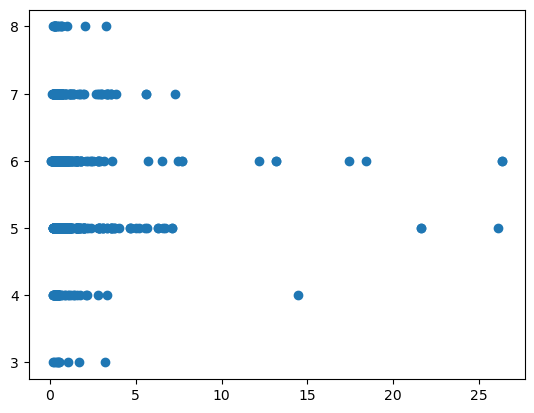

In [13]:
# 여기에 답안코드를 작성하세요
plt.scatter(wine['rat_r2a'],wine['quality'])
plt.show()


### **Q10. 다음 조건에 맞추어 데이터 프레임 wine에 새로운 컬럼 rat_cta를 제작하시기 바랍니다.**

* **
- rat_cta 는 구연산 농도를 (구연산+고정산+휘발산)농도로 나눈 값으로 정의한다.
- 구연산 : citric acid, 휘발산 : volatile acidity, 고정산 : fixed acidity
---

In [14]:
# 여기에 답안코드를 작성하세요
wine['rat_cta'] = (wine['citric acid'] / (wine['citric acid'] 
                + wine['volatile acidity'] + wine['fixed acidity']))

In [15]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rat_ca,rat_r2a,rat_cta
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000000,0.384043,0.000000
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.000000,0.689796,0.000000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.004082,0.539796,0.004651
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.057143,0.368367,0.046512
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000000,0.384043,0.000000


### **Q11. 데이터 프레임 wine의 컬럼 rat_cta를 x축으로 컬럼 quality를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**

* **
- plot에 grid(격자 표시)를 추가하시오.
---

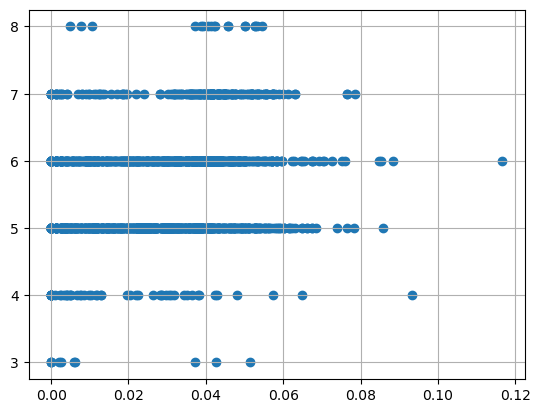

In [16]:
# 여기에 답안코드를 작성하세요
plt.scatter(wine['rat_cta'],wine['quality'])
plt.grid()
plt.show()


### **Q12. 데이터 프레임 wine의 컬럼 density와 pH를 표준화(standardization) 하시기 바랍니다**

---

In [17]:
wine[['density','pH']].head()

,density,pH
0,0.9978,3.51
1,0.9968,3.20
2,0.9970,3.26
3,0.9980,3.16
4,0.9978,3.51


In [18]:
# 여기에 답안코드를 작성하세요
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine[['density','pH']] = scaler.fit_transform(wine[['density','pH']])

In [19]:
wine[['density','pH']].head()

,density,pH
0,0.558274,1.288643
1,0.028261,-0.719933
2,0.134264,-0.331177
3,0.664277,-0.979104
4,0.558274,1.288643


### **Q13. 데이터를 트레이닝셋 / 테스트셋으로 분할하시기 바랍니다.**
* **
- y는 wine데이터 프레임의 quality컬럼이다. x는 그 나머지 컬럼들이다.
- train : test = 9 : 1
- y의 클래스가 골고루 분할되도록 stratify하게 분할한다.
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_test, y_test
- random state, seed 등은 2021로 설정한다.
---

In [20]:
# 여기에 답안코드를 작성하세요
from sklearn.model_selection import train_test_split
x = wine.drop('quality', axis=1)
y = wine['quality']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2021,test_size=0.1, stratify=y)


### **Q14. 트레이닝 데이터를 트레이닝셋 / 벨리데이션셋으로 분할하시기 바랍니다.**
* **
- x_train, y_train을 이용한다.
- train : validation = 8 : 1
- y_train의 클래스가 골고루 분할되도록 stratify하게 분할한다.
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_valid, y_valid
- random state, seed 등은 2021로 설정한다.
---

In [21]:
# 여기에 답안코드를 작성하세요
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, 
                    test_size=1/9,random_state=2021,stratify=y_train)


### **Q15. RandomForest 모델들을 학습시키시기 바랍니다.**
* **
- RandomForestClassifier 하이퍼파라미터 설정 :  n_estimators=나무의 개수, max_depth=13(각 Tree의 max depth),min_samples_leaf=5(한개의 node에 최소의 데이터 개수, 5개면 tree depth를 늘리지 않음) random_state=30
- 와인의 퀄리티를 '분류'모델링 한다.
- 트레이닝 셋 (x_train, y_train)을 이용하여 학습시킨다.
- 나무의 개수를 1에서 50까지 늘려가며 학습한다.
- 학습시킨 랜덤포레스트들은 리스트를 만들어 forests 변수에 담아둔다.
- seed나 random_state는 2021로 고정한다.
---

In [22]:
# 여기에 답안코드를 작성하세요
from sklearn.ensemble import RandomForestClassifier
forests = []

for num in range(1,51):
    model = RandomForestClassifier(n_estimators=num, max_depth=13, min_samples_leaf=5, random_state=2021)
    model.fit(x_train,y_train)
    forests.append(model)

### **Q16. RandomForest 모델들의 성능을 리스트에 담아 accs에 선언하시기 바랍니다.**
* **
- 위에 저장한 randomforest 값들을 불러온다.(forest list를 활용한다. forests[i] 형태)
- for 문 함수를 사용하여, 각 모델에 대한 valid set에 대한 acc를 확인한다.(score 함수 활용)
- 벨리데이션 셋 위에서 성능을 평가한다.
- append를 통해 accs list의 값에 계속 해당 성능 값을 추가한다.
---

In [23]:
# 여기에 답안코드를 작성하세요

accs = []

for model in forests:
    acc = model.score(x_valid,y_valid)
    accs.append(acc)

print(accs)

[0.56875, 0.60625, 0.625, 0.63125, 0.6125, 0.6625, 0.675, 0.68125, 0.68125, 0.66875, 0.68125, 0.6875, 0.69375, 0.68125, 0.68125, 0.66875, 0.66875, 0.66875, 0.6875, 0.68125, 0.69375, 0.70625, 0.7125, 0.70625, 0.7, 0.70625, 0.7, 0.70625, 0.7, 0.7, 0.7, 0.7, 0.70625, 0.70625, 0.70625, 0.7125, 0.7, 0.7, 0.70625, 0.7, 0.70625, 0.70625, 0.70625, 0.69375, 0.7, 0.7, 0.69375, 0.7, 0.70625, 0.69375]


### **Q17. RandomForest의 Tree 개수에 따른 accuracy를 시각화하시기 바랍니다.**
* **
- 위의 Q16에서 제작한 리스트 accs를 이용한다.
- line plot을 이용하여 각 모델 별 accuracy를 출력한다.
---

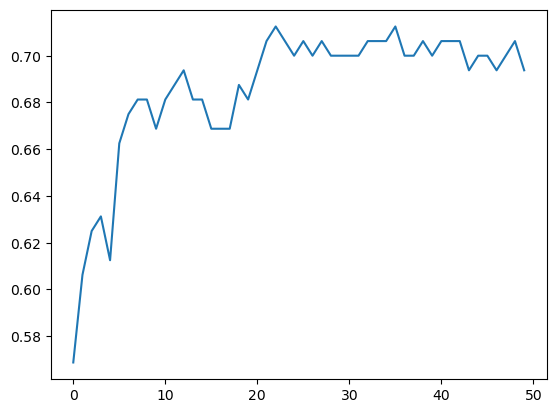

In [24]:
# 여기에 답안코드를 작성하세요
plt.plot(accs)
plt.show()


> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
>

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

### **Q18. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다.**
* **
- Tensorflow framework를 사용한다.
- 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
    * 2개의 fully connected layer를 사용할 것, 노드는 인풋레이어 노드의 2이상으로 한다.
- Early stopping을 이용하여, validation loss가 50번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
- 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
- y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.
    * 데이터에 없는 클래스까지 고려하여, 아웃풋레이어의 노드를 10개로 지정한다.
- epochs는 2000번을 지정한다.
---

In [26]:
# 여기에 답안코드를 작성하세요

model = Sequential()
model.add(Dense(x_train.shape[1]*7, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(x_train.shape[1]*7, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(verbose=1, restore_best_weights=True, patience=50)
history = model.fit(x_train,y_train, epochs=2000, batch_size=32, validation_data=(x_valid,y_valid), callbacks=[es],verbose=1)



Epoch 1/2000


C:\Users\User\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3635 - loss: 3.2454 - val_accuracy: 0.4500 - val_loss: 1.2581
Epoch 2/2000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4690 - loss: 1.1858 - val_accuracy: 0.4563 - val_loss: 1.2077
Epoch 3/2000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4992 - loss: 1.1231 - val_accuracy: 0.4625 - val_loss: 1.2028
Epoch 4/2000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4938 - loss: 1.1586 - val_accuracy: 0.4875 - val_loss: 1.1305
Epoch 5/2000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4944 - loss: 1.1626 - val_accuracy: 0.4750 - val_loss: 1.1607
Epoch 6/2000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4954 - loss: 1.1479 - val_accuracy: 0.4812 - val_loss: 1.1291
Epoch 7/2000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5119 - loss: 1.1114 - val_accuracy: 0.4625 - val_loss: 1.2909
Epoch 8/2000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4810 - loss: 1.1378 - val_accuracy: 0.4938 - val_lo

### **Q19. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시오.**
* **
- 필요한 라이브러리가 있다면 따로 불러온다.
- epochs에 따른 accuracy의 변화를 시각화 한다.
- train accuracy와 validation accuracy를 전부 시각화하고, 구별가능해야 한다.
- 그래프의 타이틀은 'Accuracy'로 표시한다.
- x축에는 'epochs'라고 표시하고 y축에는 'accuracy'라고 표시한다.
---

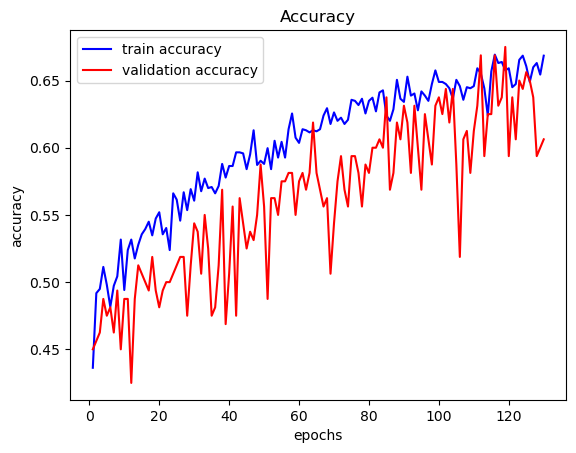

In [27]:
# 여기에 답안코드를 작성하세요
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']


# plt.plot(train_acc, label='train accuracy', color='blue')
# plt.plot(valid_acc, label='validation accuracy', color='red')

x = range(1,len(train_acc)+1)

plt.plot(x,train_acc, label='train accuracy', color='blue')
plt.plot(x,valid_acc, label='validation accuracy', color='red')

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [28]:
print(len(history.history['accuracy'])-50)
print('val_acc : ',history.history['val_accuracy'][(len(history.history['accuracy'])-50)])
print('val_loss : ',history.history['val_loss'][(len(history.history['accuracy'])-50)])

80
val_acc :  0.6000000238418579
val_loss :  1.0034343004226685


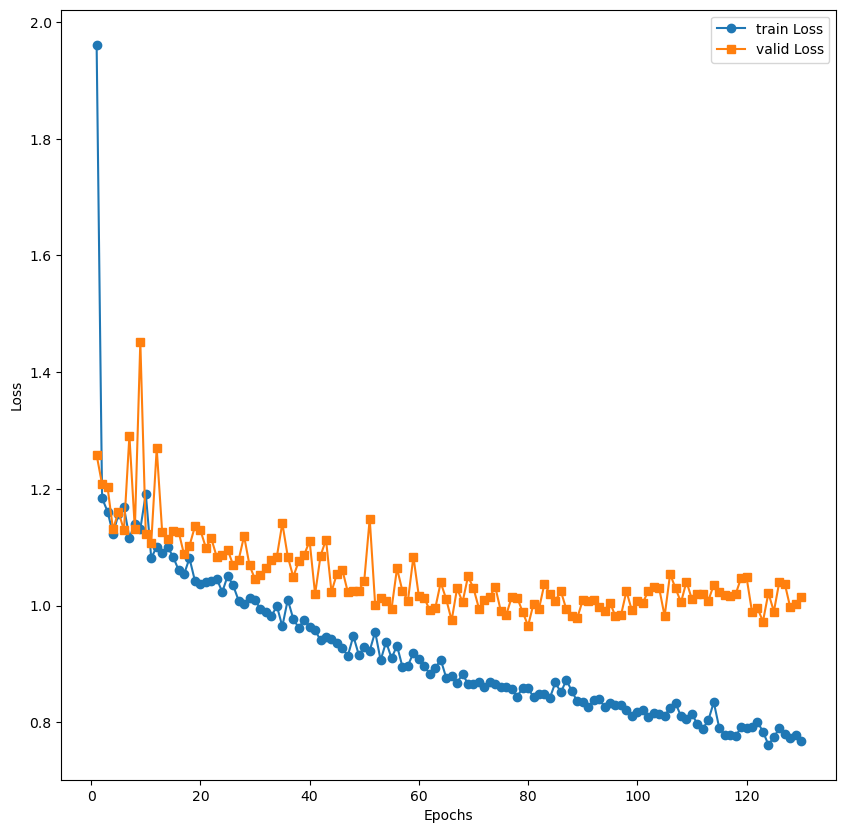

In [29]:
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10,10))
plt.plot(epochs, history.history['loss'], marker='o', label='train Loss')
plt.plot(epochs, history.history['val_loss'], marker='s', label='valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()